<p style="font-family: 'Comic Sans MS', serif; font-size: 40px; font-weight: bold; text-align: center; color: #D4EBF8; background-color: #212529; padding: 20px; border: 2px solid #D4EBF8; border-radius: 15px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">House 🏠 price prediction|Linear Regression</p>


In [1]:


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# 🎯 Objective:
#### Predict the median value of owner-occupied homes `(MEDV)` in Boston suburbs using various housing-related features (e.g., number of rooms, crime rate, tax rate).

# 🧩 Type of Problem:
#### This is a Regression problem — because the target variable `(MEDV)` is continuous numeric, not categorical.


# Predicting Housing Prices by Inputting Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
df = pd.read_csv("housing.csv", sep='\s+')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\vikram\AppData\Local\Temp\ipykernel_23352\2656429736.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("housing.csv", sep='\s+')


In [5]:

df.columns=['CrimeRate', 'ResidentialLandZone', 'IndustryProportion', 'RiverTract',
                'AirPollution', 'AvgRooms', 'OlderBuildingsPercent', 'DistanceToEmployment',
                'HighwayAccess', 'PropertyTaxRate', 'PupilTeacherRatio', 'BlackPopulation',
                'LowerStatusPercent', 'HousePrice']

In [6]:
df.shape

(505, 14)

In [7]:
df

,CrimeRate,ResidentialLandZone,IndustryProportion,RiverTract,AirPollution,AvgRooms,OlderBuildingsPercent,DistanceToEmployment,HighwayAccess,PropertyTaxRate,PupilTeacherRatio,BlackPopulation,LowerStatusPercent,HousePrice
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [8]:
df.isnull().sum()

CrimeRate                0
ResidentialLandZone      0
IndustryProportion       0
RiverTract               0
AirPollution             0
AvgRooms                 0
OlderBuildingsPercent    0
DistanceToEmployment     0
HighwayAccess            0
PropertyTaxRate          0
PupilTeacherRatio        0
BlackPopulation          0
LowerStatusPercent       0
HousePrice               0
dtype: int64

In [9]:
df.describe()

,CrimeRate,ResidentialLandZone,IndustryProportion,RiverTract,AirPollution,AvgRooms,OlderBuildingsPercent,DistanceToEmployment,HighwayAccess,PropertyTaxRate,PupilTeacherRatio,BlackPopulation,LowerStatusPercent,HousePrice
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# EDA

In [10]:
X = df.iloc[:,0:13]
y = df.iloc[:,-1]

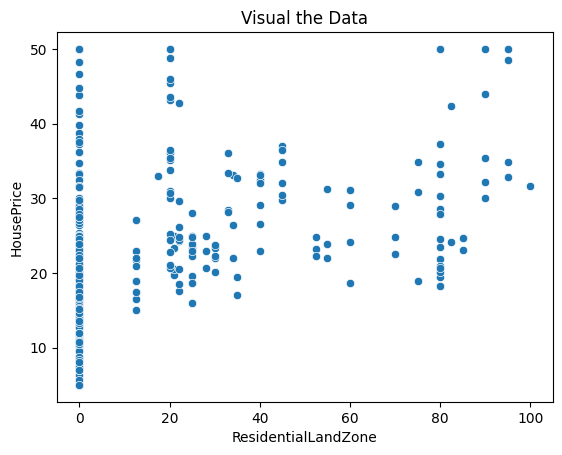

In [11]:
sns.scatterplot(data=df, x=df['ResidentialLandZone'], y=df['HousePrice'])
plt.title("Visual the Data")
plt.show()

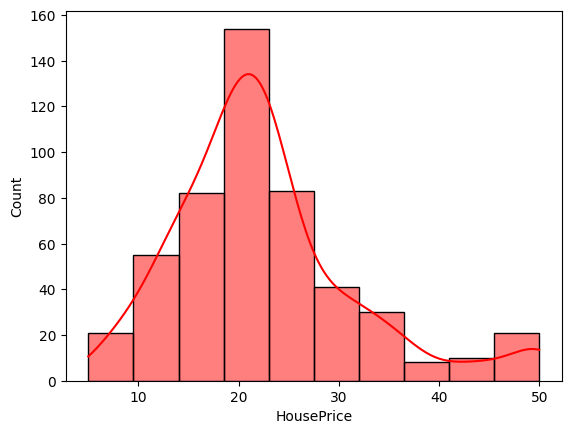

In [12]:
sns.histplot(data=df['HousePrice'], kde=True, bins=10, color='r')
plt.show()

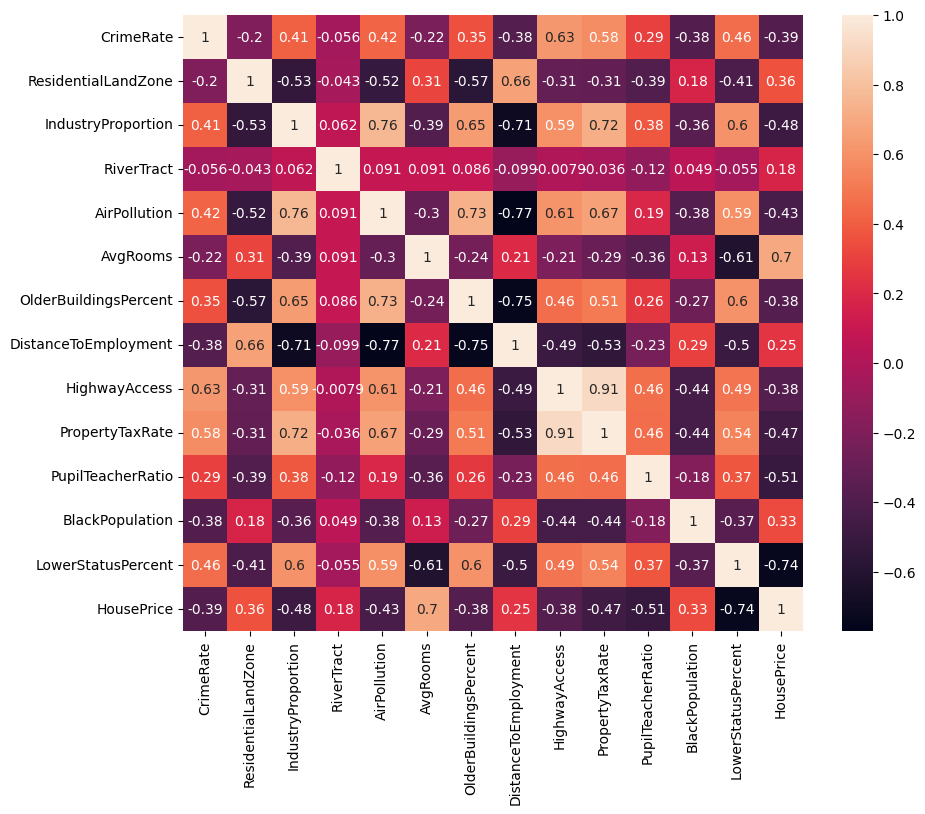

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Data Preprocessing

In [15]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
X = scaled_X

# Split the Data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=2)

In [17]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [18]:
y_pred = lr.predict(X_test)

In [19]:
y_pred

array([20.58778025, 21.47537473, 27.18278187, 17.68065004,  8.55365183,
       13.69288348, 25.30312411, -4.28875971, 15.26457907, 13.06107291,
       26.5943363 , 15.56705641, 17.43661741, 19.42189813, 17.71486584,
       30.5907312 , 20.16721624, 14.04235085,  9.55049814, 32.43405324,
       14.6209561 , 23.44207869, 27.82134217, 35.09541577, 28.54581507,
       18.43132193, 23.36799768, 19.60608628, 24.89202721, 22.88610611,
       18.52413471,  5.59960009, 18.5743672 , 25.55827903,  3.27397243,
       15.26643766, 16.58909494, 25.62958625, 30.35368401, 34.35695061,
       28.95323796, 17.6921236 , 20.61913814,  8.0404134 , 29.158403  ,
       30.68222341, 32.72682371,  6.54207358, 21.25769809, 22.39361774,
       29.21177397, 31.30094433, 22.37733428, 32.13817585, 26.58132025,
       20.8903587 , 22.76910529, 27.81166234, 13.40346367, 40.57758493,
       38.07103772, 20.67288724, 27.55380484, 12.70727912, 18.13073242,
       14.39916166, 29.35174864, 20.23071083, 24.90290231, 27.39

# Mean_Squared_Error And R2_score:

In [20]:
print("MSE: ",mean_squared_error(y_test, y_pred))
print("R2_score: ",r2_score(y_test, y_pred))

MSE:  14.82028702113609
R2_score:  0.805394898842934


# Prediction Visualization

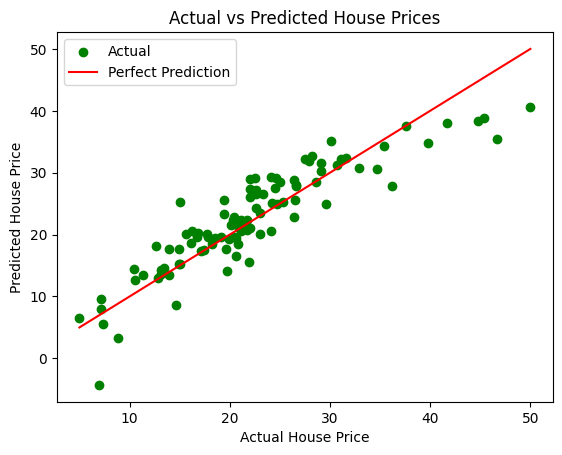

In [21]:
plt.scatter(y_test, y_pred, color='g', label='Actual')

# Line: perfect prediction (y = x)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='-', label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()